# Central Limit Theorem


Situation we want to model: a group of people who are making independent actions/decisions (e.g. binary decisions) - what are going to be the frequencies of different actions?
* E.g. a family of 4 deciding if they want to go for a walk
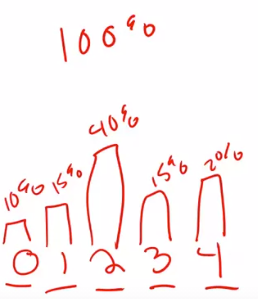
* This is using the notion of a [probability distribution](https://en.wikipedia.org/wiki/Probability_distribution)

**Central Limit Theorem**
 * Informally: if a large number of people make decisions **independently**, the resulting distribution of outcomes will be bell-shaped (i.e. a normal or Gaussian distribution)

## Example: flipping coins

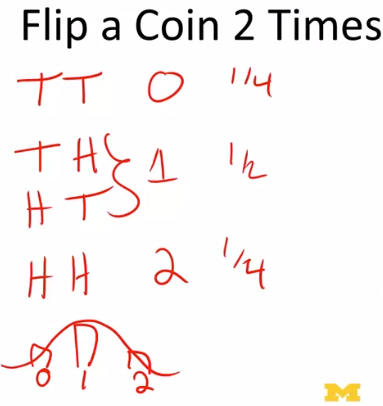

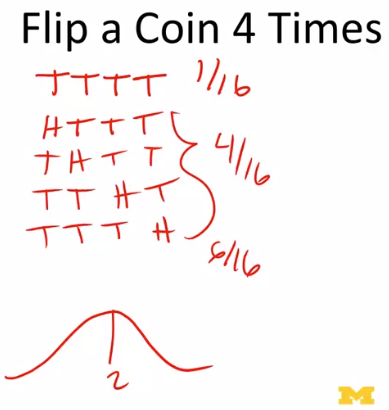

Let's verify this frequency distributions using some simulations.

In [1]:
# Setup
using Random # Built-in packages
using Distributions, Plots, StatsPlots # External packages
gr(fmt = :png, size = (900, 500))
Random.seed!(20210203); # Set seed for reproducibility

We can simulate coin flips using the [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution):

$
P(X = k) = \begin{cases}
1 - p & \quad \text{for } k = 0, \quad \text{(e.g. tails)}\\
p & \quad \text{for } k = 1 \quad \text{(e.g. heads)}.
\end{cases}
$

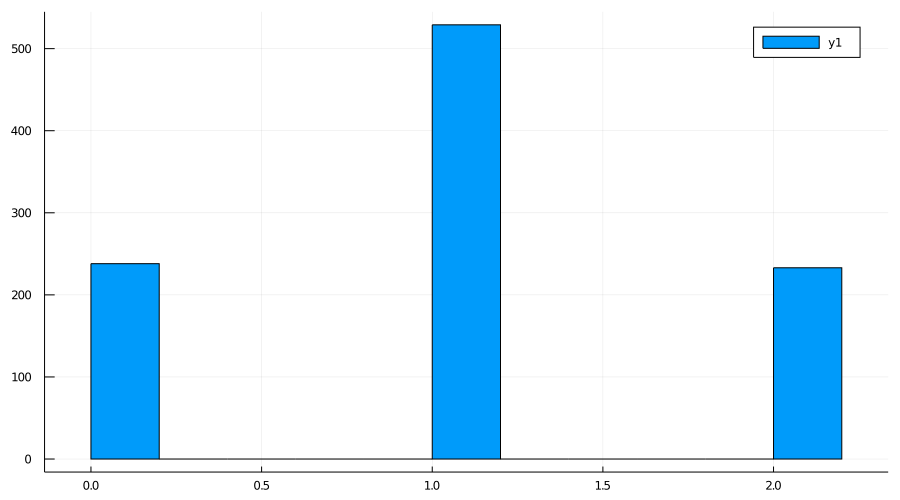

In [2]:
# Function for plotting number of heads in experiments with coin flips
function hist_heads(n_reps, n_coins, p_head=0.5)
    outcomes = rand(Bernoulli(p_head), n_reps, n_coins)
    n_heads = sum(outcomes, dims=2)
    histogram(n_heads)
end

# Flip 2 coins 1000 times
hist_heads(1000, 2)

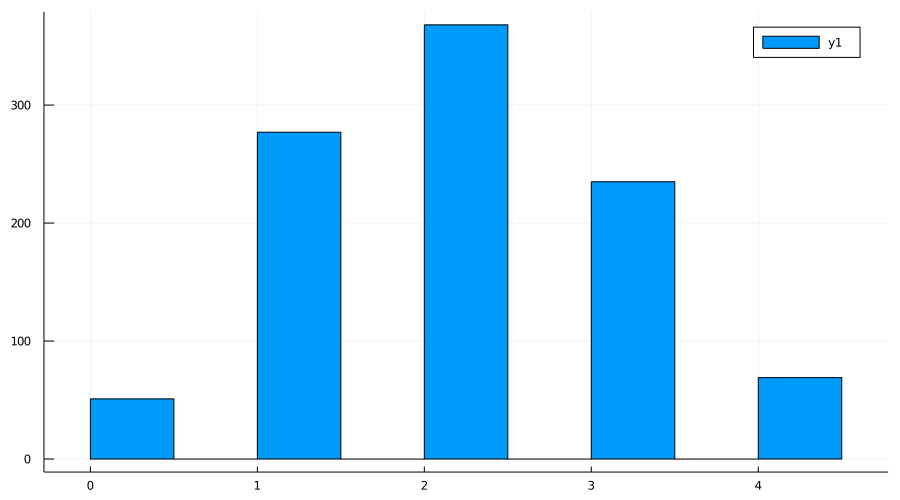

In [3]:
# Flip 4 coins 1000 times
hist_heads(1000, 4)

How can we generally know the expected number of heads out of N coin flips (i.e. the sum of N Bernoulli random variables)? The resulting distribution is the [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution):

$
P(X = k) = {n \choose k}p^k(1-p)^{n-k},  \quad \text{ for } k = 0,1,2, \ldots, n,
$

where $k$ is the number of successes (e.g. heads) and $n$ is the number of trials (e.g. coin flips).

Let's see what a binomial probability mass function looks for a large $N$.

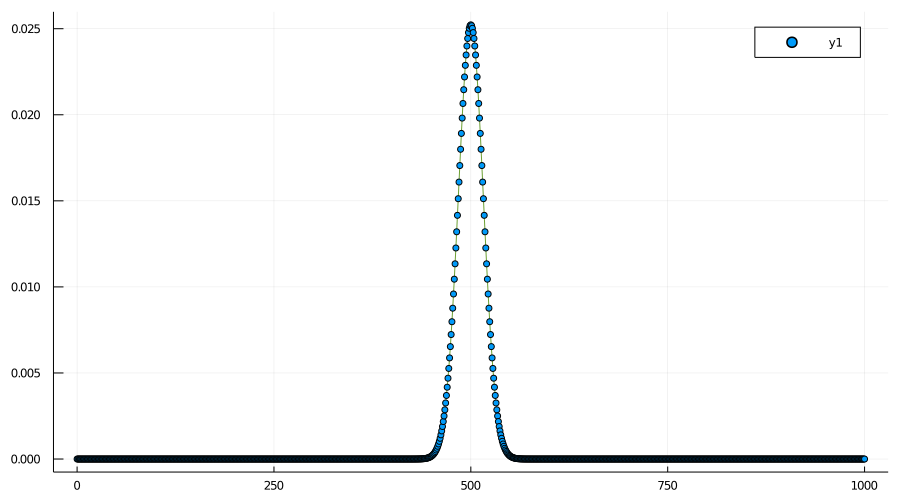

In [4]:
plot(Binomial(1000, 0.5))

Here we can see two things intuitively:
* Although each outcome is quite unpredictable (50% chance is most unpredictable), the sum is quite predictable (probable number of heads is tightly amassed at 500)
* The probability distribution is similar to a Gaussian

The mean of a binomial distribution is given by $\mu = np$, and its standard deviation is $\sigma = \sqrt{p(1-p)n}$. A special case for a binomial distribution with $p = 0.5$ (e.g. flips of a fair coin), is $\mu = \frac{n}{2}$ and $\sigma = \frac{\sqrt{n}}{2}$.

Let us see how does a Gaussian distribution with the same parameters $\mu$ and $\sigma$ approximate the binomial.

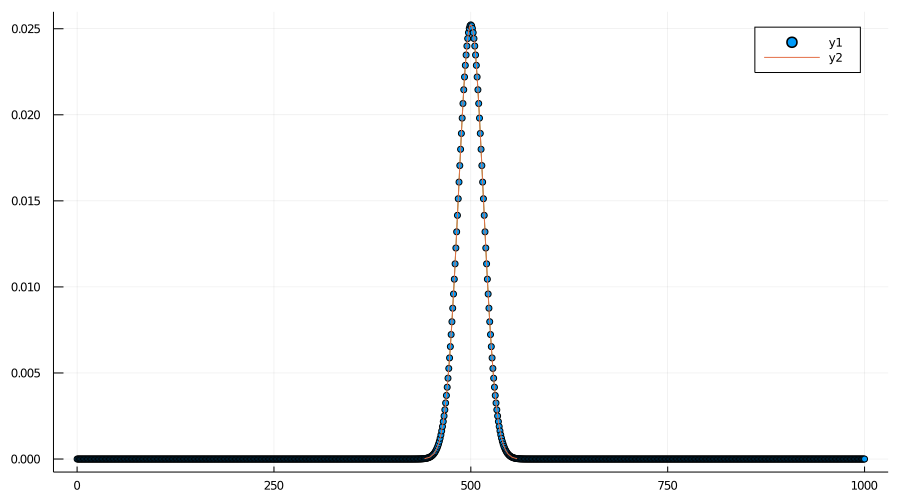

In [5]:
N = 1000
p = 0.5
μ = N*p
σ = sqrt(p*(1-p)*N)

plot(Binomial(N, p))
plot!(Normal(1000/2, sqrt(1000)/2))

This Gaussian approximation is useful because it allows us to easily predict what proportion of outcomes is going to fall into what value ranges.

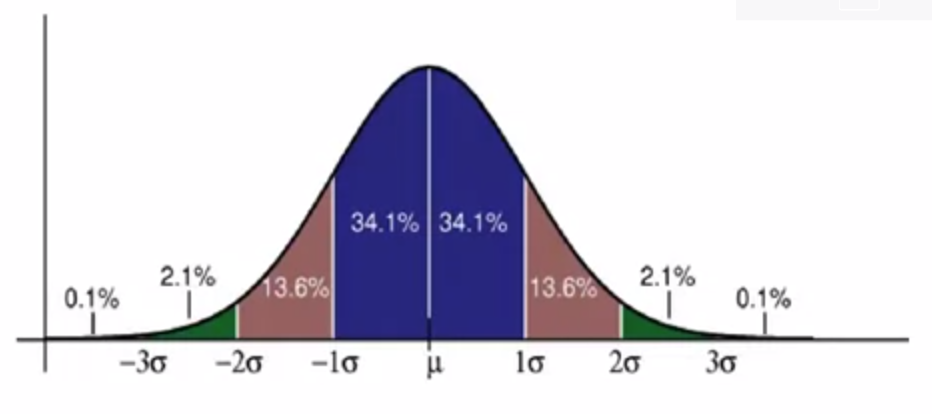

From the property of the Gaussian distribution, we know 68% of outcomes is going to be in the interval $\mu \pm \sigma$, 95% of outcomes is in $\mu \pm 2\sigma$, and 99.75% outcomes is in $\mu \pm 3\sigma$. 

**Example**: overbooking planes

If a Boeing 747 has 380 seats, and from historical data, we know the show-up rate is 90%, can we safely sell 400 tickets?

Let us further assume that each person showing up is independent of everyone else.
In this case we can model the situation with a binomial distribution, to be approximated by a gaussian.

The number of people who will show up can be modeled as $X \sim \mathrm{Binom}(n = 400, p = 0.9)$, and approximated with $X \sim \mathcal{N}(\mu = np = 360, \sigma = \sqrt{p(1-p)n} = 6)$. We then ask what is $P(X > 380)$? We can answer this indirectly, by observing that $\mu + 3\sigma = 378$. This means that less than $(100 - 99.75)/2\% = 0.125\%$ of flights will be overbooked. 

We can answer this directly by plugging the threshold value into the cumulative distribution function $CDF(x) = P(X \leq x)$. Since we are interested in $P(X > x)$, we calculate $P(X > x) = 1 - P(X \leq x)$:

In [6]:
(1 - cdf(Normal(360, 6), 380)) * 100

0.04290603331967846

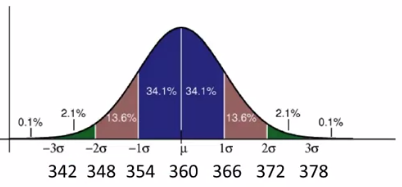

Central Limit Theorem (a bit more formally):
Add an increasing number of random variables (e.g. Bernoulli trials)
* **independent** and
* **finite variance**

produces increasingly narrow Gaussian distributions (e.g., the Binomial - sum of Bernoulli variables - becomes increasingly normal as we increase the number of sumands).
The important point to notice is that the summed variables themselves are not normal!

Does the CLT always apply? No: e.g. outcomes such as stock returns are not independent, and there are some distributions that don't even have finite variance (e.g. Cauchy's distribution, due to its heavy tails).

A further discussion of the CLT, as well as its relation to the Law of Large Numbers (LLN) and its generalization to the multivariate case, can be found here: https://julia.quantecon.org/tools_and_techniques/lln_clt.html

It appears the CLT is not as important in Bayesian inference, see discussion [here](https://stats.stackexchange.com/questions/317521/does-central-limit-theorem-apply-to-bayesian-inference). 

## Six Sigma

* ["Six Sigma"](https://en.wikipedia.org/wiki/Six_Sigma) is a management practice developed by Motorola in 1986
* Aiming to have $\mu \pm 6\sigma$ within tolerances, i.e. only 3.4 failures (e.g. defects) in 1 million opportunities

**Example**: sale of bananas

Average sales $\mu = 500 \text{lbs}$

Sales SD $\sigma = 10 \text{lbs}$

How much should we have on stock in order to have a six sigma performance?

$\mu \pm 6\sigma = 500 + 6 \times 10 = 560$

